<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries-&amp;-Load-Data" data-toc-modified-id="Import-Libraries-&amp;-Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries &amp; Load Data</a></span><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Self-Defined-Tools" data-toc-modified-id="Self-Defined-Tools-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Self-Defined Tools</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Data-Merge" data-toc-modified-id="Data-Merge-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data Merge</a></span></li></ul></li><li><span><a href="#Analysis-of-variable-and-label" data-toc-modified-id="Analysis-of-variable-and-label-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis of variable and label</a></span><ul class="toc-item"><li><span><a href="#req_time-and-label" data-toc-modified-id="req_time-and-label-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>req_time and label</a></span></li><li><span><a href="#o-and-label" data-toc-modified-id="o-and-label-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>o and label</a></span><ul class="toc-item"><li><span><a href="#Shenzhen-and-Guangzhou" data-toc-modified-id="Shenzhen-and-Guangzhou-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Shenzhen and Guangzhou</a></span></li><li><span><a href="#Beijing" data-toc-modified-id="Beijing-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Beijing</a></span></li><li><span><a href="#ShangHai" data-toc-modified-id="ShangHai-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>ShangHai</a></span></li></ul></li><li><span><a href="#recommened-plans-&amp;-label" data-toc-modified-id="recommened-plans-&amp;-label-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>recommened plans &amp; label</a></span><ul class="toc-item"><li><span><a href="#Get-recommended-features" data-toc-modified-id="Get-recommended-features-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Get recommended features</a></span></li><li><span><a href="#rank-and-label" data-toc-modified-id="rank-and-label-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>rank and label</a></span></li><li><span><a href="#rank0-and-label" data-toc-modified-id="rank0-and-label-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>rank0 and label</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Import Libraries & Load Data
##  Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os 
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.svm import NuSVR, SVR
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb
import xgboost as xgb
import time
import datetime 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedKFold
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
import gc

from scipy.signal import hilbert
from scipy.signal import hann
from scipy.signal import convolve
from scipy import stats
from sklearn.kernel_ridge import KernelRidge
 
from collections import Counter 
from statistics import mode 
    
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from tqdm import tqdm
import json 
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from itertools import product
import ast 
tqdm.pandas()

import plotly.plotly as py
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
plotly.offline.init_notebook_mode(connected=True)

## Self-Defined Tools 

In [2]:
def value_counts_plot(df, name, xmin = False):
    
    plt.figure(figsize=[16,8])
    plt.subplot(1, 2, 1)
    df[name].value_counts().sort_index().plot()
    if xmin == True:
        plt.xlim(xmin = -100)
    plt.xlabel(name)
    plt.ylabel('Number of appeareance')
    
    plt.subplot(1, 2, 2)
    df[name].value_counts().value_counts().sort_index().plot()
    if xmin == True:
        plt.xlim(xmin = -100)
    plt.xlabel('Number of appeareance of {}'.format(name))
    plt.ylabel('Number of appeareance of appearance')

## Load Data

In [3]:
path = '/data/Data_JieZhang/KDD/Phase2/'

train_queries1 = pd.read_csv(path + 'train_queries_phase1.csv', parse_dates=['req_time'])
train_plans1   = pd.read_csv(path + 'train_plans_phase1.csv', parse_dates=['plan_time'])
train_clicks1  = pd.read_csv(path + 'train_clicks_phase1.csv')

train_queries2 = pd.read_csv(path + 'train_queries_phase2.csv', parse_dates=['req_time'])
train_plans2   = pd.read_csv(path + 'train_plans_phase2.csv', parse_dates=['plan_time'])
train_clicks2  = pd.read_csv(path + 'train_clicks_phase2.csv')

profiles      = pd.read_csv(path + 'profiles.csv') 

test_queries  = pd.read_csv(path + 'test_queries.csv', parse_dates=['req_time'])
test_plans    = pd.read_csv(path + 'test_plans.csv', parse_dates=['plan_time'])

In [4]:
train_plans   = pd.concat([train_plans1, train_plans2],axis=0,ignore_index=True)
train_queries = pd.concat([train_queries1, train_queries2],axis=0,ignore_index=True)
train_clicks  = pd.concat([train_clicks1, train_clicks2],axis=0,ignore_index=True)

## Data Merge

In [10]:
train = train_queries.merge(train_plans, 'left', ['sid'])
test  = test_queries.merge(test_plans, 'left', ['sid']) 
train = train.merge(train_clicks, 'left', ['sid'])
train['click_mode'] = train['click_mode'].fillna(0).astype(int)
data = pd.concat([train, test], ignore_index=True)

# Analysis of variable and label

In [26]:
train.head()

,sid,pid,req_time,o,d,plan_time,plans,click_time,click_mode,day,month,dt
0,419087,22813.0,2018-10-17 10:17:11,"116.34,39.99","116.37,39.86",2018-10-17 10:17:11,"[{""distance"": 17883, ""price"": 700, ""eta"": 3561...",2018-10-17 10:17:27,7,17,10,2018-10-17
1,481938,NaN,2018-10-13 15:50:15,"116.43,39.94","116.46,39.95",2018-10-13 15:50:15,"[{""distance"": 3358, ""price"": 200, ""eta"": 1742,...",2018-10-13 15:50:21,1,13,10,2018-10-13
2,441201,34393.0,2018-10-13 16:15:21,"116.28,40.01","116.39,39.99",2018-10-13 16:15:21,"[{""distance"": 14638, ""price"": 700, ""eta"": 3452...",2018-10-13 16:15:40,7,13,10,2018-10-13
3,347266,NaN,2018-10-22 13:26:04,"116.31,39.51","116.32,39.72",2018-10-22 13:26:04,"[{""distance"": 26407, ""price"": 900, ""eta"": 3992...",2018-10-22 13:26:10,7,22,10,2018-10-22
4,206269,NaN,2018-11-08 10:27:23,"116.33,39.89","116.59,39.76",2018-11-08 10:27:23,"[{""distance"": 42000, ""price"": 800, ""eta"": 6941...",2018-11-08 10:27:30,7,8,11,2018-11-08


## req_time and label
1. At day 10-9 and 11-5, the click mode is only 0, which may be sample problems.
2. The percentage of each click mode at every day only varies a little.

In [ ]:
train['dt']   = pd.to_datetime(train['req_time']).dt.date
train['month'] = pd.to_datetime(train['req_time']).dt.month

Text(0.5,0,'date')

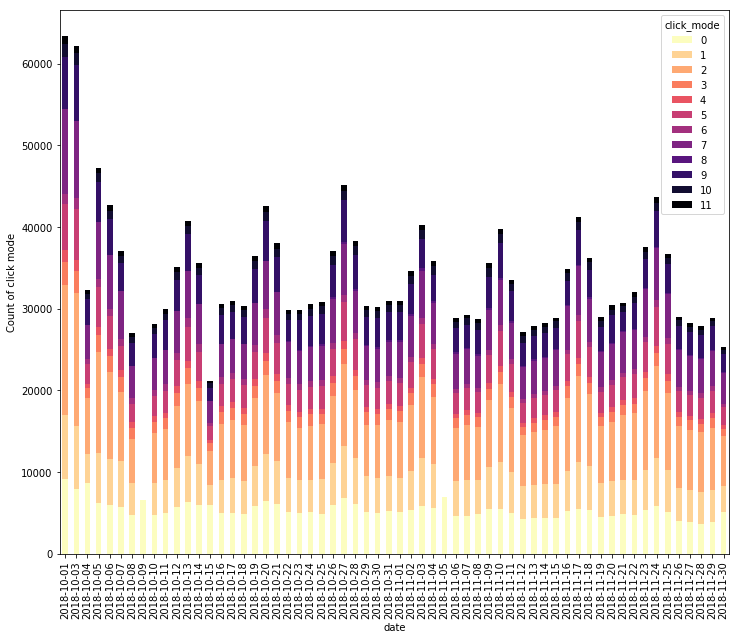

In [25]:
tmp = train.groupby(['dt','click_mode'])['sid'].count()
plt.figure(figsize=[16,8]) 
tmp.unstack().plot(kind='bar',stacked=True, colormap= 'magma_r', figsize=(12,10),  grid=False) 
plt.ylabel('Count of click mode')
plt.xlabel('date')  

## o and label
-  there are at least three different provinces

In [27]:
train['o_lat'] = train['o'].map(lambda x: float(x.split(',')[0])).values
train['o_lng'] = train['o'].map(lambda x: float(x.split(',')[1])).values 

Text(0,0.5,'o_lng')

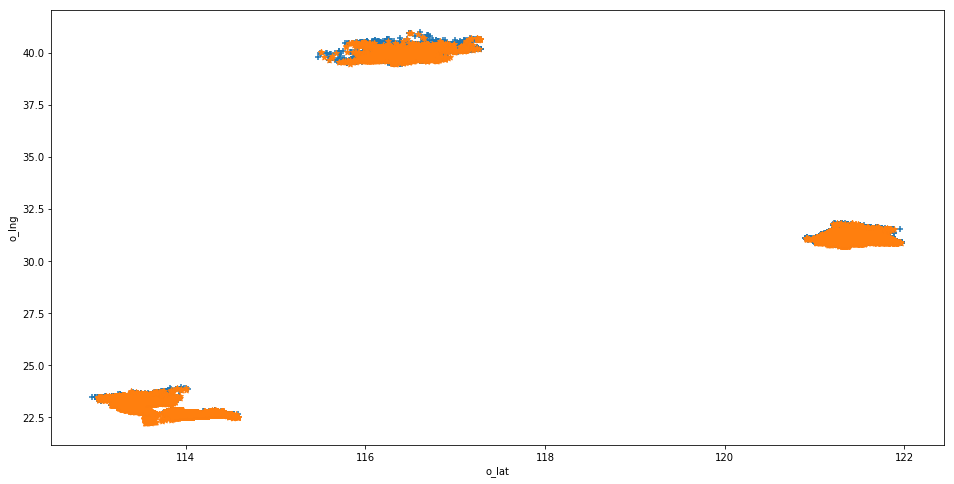

In [34]:
plt.figure(figsize=[16,8]) 
plt.scatter( x = train.loc[train.click_mode != 0]['o_lat'], y= train.loc[train.click_mode!= 0]['o_lng'], marker='+')
plt.scatter( x = train.loc[train.click_mode == 0]['o_lat'], y= train.loc[train.click_mode== 0]['o_lng'], marker='*')  
plt.xlabel('o_lat')
plt.ylabel('o_lng') 

### Shenzhen and Guangzhou
1. There are more zeros in Shenzhen.
2. If you are more close to the center of the province, there are more zeros.

Text(0,0.5,'o_lng')

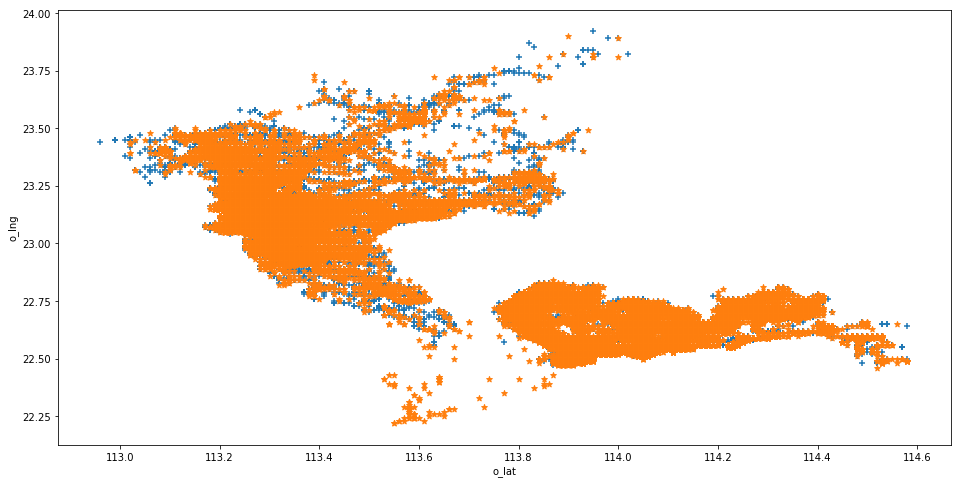

In [35]:
plt.figure(figsize=[16,8]) 
ind1 = (train.click_mode != 0) & (train.o_lat <= 115) & (train.o_lng <= 25) 
ind2 = (train.click_mode == 0) & (train.o_lat <= 115) & (train.o_lng <= 25) 
plt.scatter( x = train.loc[ind1]['o_lat'], y= train.loc[ind1]['o_lng'], marker='+')
plt.scatter( x = train.loc[ind2]['o_lat'], y= train.loc[ind2]['o_lng'], marker='*')  
plt.xlabel('o_lat')
plt.ylabel('o_lng') 

### Beijing
1. There are less zeros at suburbs in Beijing.
2. If you are more close to the center of the province, there are more zeros.

Text(0,0.5,'o_lng')

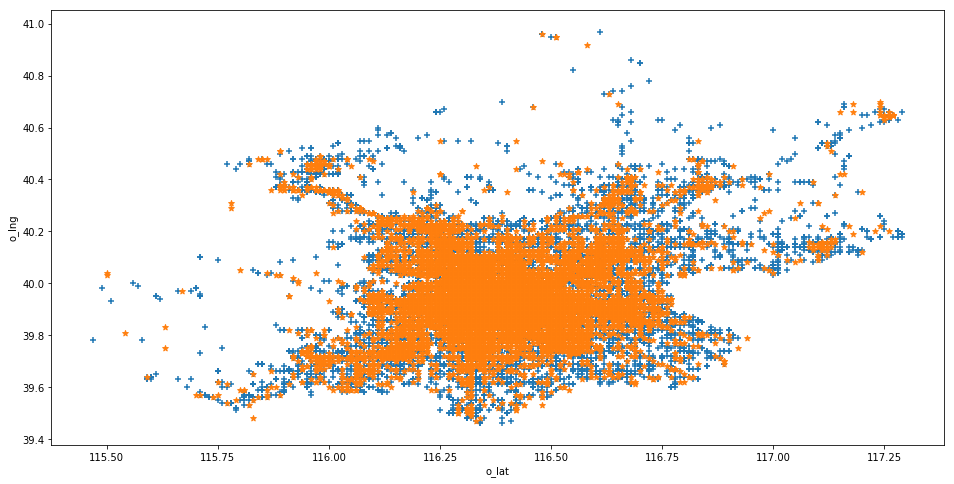

In [32]:
plt.figure(figsize=[16,8]) 
ind1 = (train.click_mode != 0) & (train.o_lat > 115) & (train.o_lng >= 35) 
ind2 = (train.click_mode == 0) & (train.o_lat > 115) & (train.o_lng >= 35) 
plt.scatter( x = train.loc[ind1]['o_lat'], y= train.loc[ind1]['o_lng'], marker='+')
plt.scatter( x = train.loc[ind2]['o_lat'], y= train.loc[ind2]['o_lng'], marker='*')  
plt.xlabel('o_lat')
plt.ylabel('o_lng') 

### ShangHai
1. The zeros in Shanghai are the least.
2. The zeros are more evenly distributed.

Text(0,0.5,'o_lng')

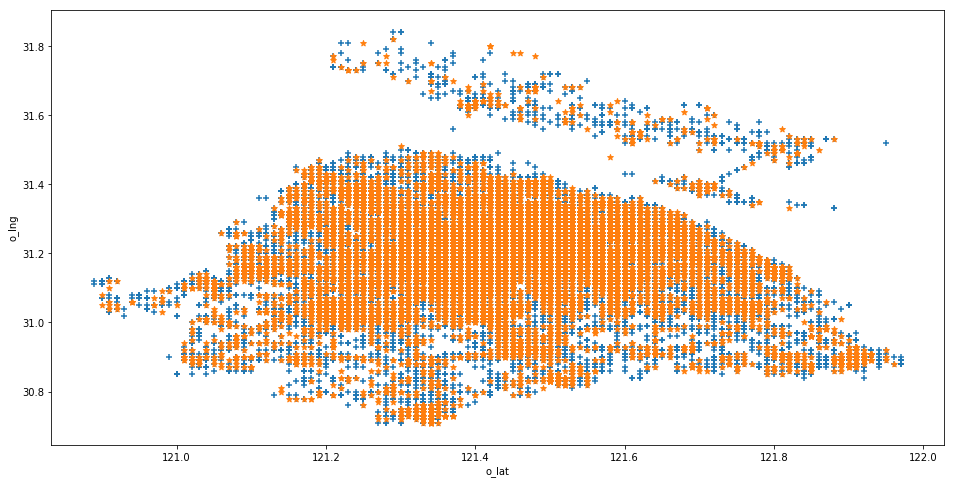

In [33]:
plt.figure(figsize=[16,8]) 
ind1 = (train.click_mode != 0) & (train.o_lng <= 35) & (train.o_lng >= 25) 
ind2 = (train.click_mode == 0) & (train.o_lng <= 35) & (train.o_lng >= 25)
plt.scatter( x = train.loc[ind1]['o_lat'], y= train.loc[ind1]['o_lng'], marker='+')
plt.scatter( x = train.loc[ind2]['o_lat'], y= train.loc[ind2]['o_lng'], marker='*')  
plt.xlabel('o_lat')
plt.ylabel('o_lng') 

In [36]:
train.head()

,sid,pid,req_time,o,d,plan_time,plans,click_time,click_mode,day,month,dt,o_lat,o_lng
0,419087,22813.0,2018-10-17 10:17:11,"116.34,39.99","116.37,39.86",2018-10-17 10:17:11,"[{""distance"": 17883, ""price"": 700, ""eta"": 3561...",2018-10-17 10:17:27,7,17,10,2018-10-17,116.34,39.99
1,481938,NaN,2018-10-13 15:50:15,"116.43,39.94","116.46,39.95",2018-10-13 15:50:15,"[{""distance"": 3358, ""price"": 200, ""eta"": 1742,...",2018-10-13 15:50:21,1,13,10,2018-10-13,116.43,39.94
2,441201,34393.0,2018-10-13 16:15:21,"116.28,40.01","116.39,39.99",2018-10-13 16:15:21,"[{""distance"": 14638, ""price"": 700, ""eta"": 3452...",2018-10-13 16:15:40,7,13,10,2018-10-13,116.28,40.01
3,347266,NaN,2018-10-22 13:26:04,"116.31,39.51","116.32,39.72",2018-10-22 13:26:04,"[{""distance"": 26407, ""price"": 900, ""eta"": 3992...",2018-10-22 13:26:10,7,22,10,2018-10-22,116.31,39.51
4,206269,NaN,2018-11-08 10:27:23,"116.33,39.89","116.59,39.76",2018-11-08 10:27:23,"[{""distance"": 42000, ""price"": 800, ""eta"": 6941...",2018-11-08 10:27:30,7,8,11,2018-11-08,116.33,39.89


## recommened plans & label 
### Get recommended features

In [37]:
train_plans['plans'] = train_plans['plans'].fillna('[]').apply(ast.literal_eval)

In [38]:
def _plans_trans(df):
    df_plans_pivot   = pd.DataFrame()
    sids             = []
    prices           = []
    distances        = []
    etas             = []
    transport_modes  = []
    ranks            = []   
    plan_times       = []   
    for sid,plan_time,plans in tqdm(df[['sid','plan_time','plans']].values):
         
        for i,plan in enumerate(plans):
            sids.append(sid)
            transport_modes.append(plan['transport_mode'])
            distances.append(plan['distance'])
            etas.append(plan['eta'])
            prices.append(plan['price']) 
            plan_times.append(plan_time)
            ranks.append(i)
    df_plans_pivot['sid']             = sids
    df_plans_pivot['price']           = prices
    df_plans_pivot['distance']        = distances
    df_plans_pivot['transport_mode']  = transport_modes
    df_plans_pivot['ranks']           = ranks
    df_plans_pivot['plan_time']       = plan_times 
    df_plans_pivot['etas']            = etas 
    df_plans_pivot['price']           = df_plans_pivot['price'].apply(lambda x: 0 if x == '' else float(x))
    return df_plans_pivot

In [39]:
%%time
plans_pivot = _plans_trans(train_plans)

100%|██████████| 1938572/1938572 [00:08<00:00, 237975.44it/s]


CPU times: user 26.8 s, sys: 2.66 s, total: 29.4 s
Wall time: 29.4 s


In [40]:
def get_first_second_common(x,i):
    t = Counter(x)
    try:
        return t.most_common()[i][0]
    except:
        return -1

def _get_sid_features(df):
    df_sid                      =  pd.DataFrame()
    df_sid['sid']               =  df['sid'].unique()
    
    # sid: cnt
    sid_cnt_dic                 = df.groupby('sid')['transport_mode'].count().to_dict()
    df_sid['sid_transport_cnt'] = df_sid['sid'].map(sid_cnt_dic).values
    
    #sid(ranks):transport
    len_ = df['ranks'].max()
    for i in tqdm(range(len_ + 1)):
        df_          =  df.loc[df.ranks == i].copy()
        sid_rank_transmode_dic =  dict(zip(df_['sid'],df_['transport_mode']))   #df_.groupby('sid')['transport_mode'].min().to_dict()
        sid_rank_price_dic     =  dict(zip(df_['sid'],df_['price']))            #df_.groupby('sid')['price'].min().to_dict()
        sid_rank_eta_dic       =  dict(zip(df_['sid'],df_['etas']))             #df_.groupby('sid')['etas'].min().to_dict()
        sid_rank_distance_dic  =  dict(zip(df_['sid'],df_['distance']))         #df_.groupby('sid')['distance'].min().to_dict()
        
        df_sid['sid_rank{}_transport_mode'.format(i)] = df_sid['sid'].map(sid_rank_transmode_dic).values
        df_sid['sid_rank{}_price'.format(i)]          = df_sid['sid'].map(sid_rank_price_dic).values
        df_sid['sid_rank{}_eta'.format(i)]            = df_sid['sid'].map(sid_rank_eta_dic).values
        df_sid['sid_rank{}_distance'.format(i)]       = df_sid['sid'].map(sid_rank_distance_dic).values
     
    for i in tqdm(range(1,len_)): 
        df_1          =  df.loc[df.ranks == i].copy()
        df_2          =  df.loc[df.ranks == i - 1].copy() 
        sid_rank_price_dic1     =  dict(zip(df_1['sid'],df_1['price']))             
        sid_rank_eta_dic1       =  dict(zip(df_1['sid'],df_1['etas']))              
        sid_rank_distance_dic1  =  dict(zip(df_1['sid'],df_1['distance']))      

        sid_rank_price_dic2     =  dict(zip(df_2['sid'],df_2['price']))             
        sid_rank_eta_dic2       =  dict(zip(df_2['sid'],df_2['etas']))              
        sid_rank_distance_dic2  =  dict(zip(df_2['sid'],df_2['distance']))         

        df_sid['sid_rank{}_{}_price'.format(i-1,i)]          = df_sid['sid'].map(sid_rank_price_dic1).values - df_sid['sid'].map(sid_rank_price_dic2).values
        df_sid['sid_rank{}_{}_eta'.format(i-1,i)]            = df_sid['sid'].map(sid_rank_eta_dic1).values   - df_sid['sid'].map(sid_rank_eta_dic2).values
        df_sid['sid_rank{}_{}_distance'.format(i-1,i)]       = df_sid['sid'].map(sid_rank_distance_dic1).values - df_sid['sid'].map(sid_rank_distance_dic2).values

    df['price_div_distance']  =    df['price'].values / df['distance'].values
    df['etas_div_distance']   =    df['etas'].values  / df['distance'].values
    df['etas_div_price']      =    df['etas'].values  / df['price'].values 
    
    
    df_grp_sid = df.groupby('sid')
    sid_price_div_distance_min_dic        = df_grp_sid['price_div_distance'].min().to_dict() 
    df_sid['sid_price_div_distance_min']  = df_sid['sid'].map(sid_price_div_distance_min_dic).values 
     
    sid_price_div_distance_std_dic        = df_grp_sid['price_div_distance'].std().to_dict() 
    df_sid['sid_price_div_distance_std']  = df_sid['sid'].map(sid_price_div_distance_std_dic).values 
    
    sid_etas_div_distance_min_dic         = df_grp_sid['etas_div_distance'].min().to_dict() 
    df_sid['sid_etas_div_distance_min']   = df_sid['sid'].map(sid_etas_div_distance_min_dic).values
    
    sid_etas_div_distance_std_dic         = df_grp_sid['etas_div_distance'].std().to_dict() 
    df_sid['sid_etas_div_distance_std']   = df_sid['sid'].map(sid_etas_div_distance_std_dic).values
    
    sid_etas_div_price_min_dic            = df_grp_sid['etas_div_price'].min().to_dict() 
    df_sid['sid_etas_div_price_min']      = df_sid['sid'].map(sid_etas_div_price_min_dic).values
    sid_etas_div_price_std_dic            = df_grp_sid['etas_div_price'].std().to_dict() 
    df_sid['sid_etas_div_price_std']      = df_sid['sid'].map(sid_etas_div_price_std_dic).values
     
    
    ##################################新加的##########################################     
    sid_etas_div_distance_max_dic         = df_grp_sid['etas_div_distance'].max().to_dict() 
    df_sid['sid_etas_div_distance_max']   = df_sid['sid'].map(sid_etas_div_distance_max_dic).values
    sid_etas_div_price_max_dic            = df_grp_sid['etas_div_price'].max().to_dict() 
    df_sid['sid_etas_div_price_max']      = df_sid['sid'].map(sid_etas_div_price_max_dic).values
    sid_price_div_distance_max_dic        = df_grp_sid['price_div_distance'].max().to_dict() 
    df_sid['sid_price_div_distance_max']  = df_sid['sid'].map(sid_price_div_distance_max_dic).values 
        
    df_sid['sid_price_div_distance_max_min']  = df_sid['sid_price_div_distance_max'] - df_sid['sid_price_div_distance_min'] 
    df_sid['sid_etas_div_price_max_min']      = df_sid['sid_etas_div_price_max'] - df_sid['sid_etas_div_price_min'] 
    df_sid['sid_etas_div_distance_max_min']   = df_sid['sid_etas_div_distance_max'] - df_sid['sid_etas_div_distance_min']     
    del df_sid['sid_etas_div_price_max']
    del df_sid['sid_price_div_distance_max']
    del df_sid['sid_etas_div_distance_max']
    del df_sid['sid_etas_div_price_min']
    del df_sid['sid_price_div_distance_min']
    del df_sid['sid_etas_div_distance_min']
    
    
    sid_distance_min_dic            = df_grp_sid['distance'].min().to_dict() 
    df_sid['sid_distance_min']      = df_sid['sid'].map(sid_distance_min_dic).values 
    sid_price_min_dic               = df_grp_sid['price'].min().to_dict() 
    df_sid['sid_price_min']         = df_sid['sid'].map(sid_price_min_dic).values 
    sid_etas_min_dic                = df_grp_sid['etas'].min().to_dict() 
    df_sid['sid_etas_min']          = df_sid['sid'].map(sid_etas_min_dic).values
    
    sid_distance_max_dic            = df_grp_sid['distance'].max().to_dict() 
    df_sid['sid_distance_max']      = df_sid['sid'].map(sid_distance_max_dic).values 
    sid_price_max_dic               = df_grp_sid['price'].max().to_dict() 
    df_sid['sid_price_max']         = df_sid['sid'].map(sid_price_max_dic).values 
    sid_etas_max_dic                = df_grp_sid['etas'].max().to_dict() 
    df_sid['sid_etas_max']          = df_sid['sid'].map(sid_etas_max_dic).values
    
    df_sid['sid_distance_max_min']  = df_sid['sid_distance_max'] - df_sid['sid_distance_min'] 
    df_sid['sid_price_max_min']     = df_sid['sid_price_max'] - df_sid['sid_price_min'] 
    df_sid['sid_etas_max_min']      = df_sid['sid_etas_max'] - df_sid['sid_etas_min']  
    
    del df_sid['sid_distance_max']
    del df_sid['sid_price_max']
    del df_sid['sid_etas_max']
    del df_sid['sid_distance_min']
    del df_sid['sid_price_min']
    del df_sid['sid_etas_min']
    ##################################新加的##########################################      
     
    sid_etas_mean_dic                = df_grp_sid['etas'].mean().to_dict() 
    df_sid['sid_etas_mean']          = df_sid['sid'].map(sid_etas_mean_dic).values 
    sid_price_mean_dic               = df_grp_sid['price'].mean().to_dict() 
    df_sid['sid_price_mean']         = df_sid['sid'].map(sid_price_mean_dic).values 
    sid_distance_mean_dic            = df_grp_sid['distance'].mean().to_dict() 
    df_sid['sid_distance_mean']      = df_sid['sid'].map(sid_distance_mean_dic).values
    
    for fea in tqdm(['distance','price','etas']): #,'price_div_distance','etas_div_distance','etas_div_price']):
        #sid(ranks):transport
        df[fea + '_min']                          =  df_grp_sid[fea].transform(min)
        df_          =  df.loc[df[fea + '_min']   == df[fea]].drop_duplicates(subset=['sid',fea],keep='first').copy()
        sid_transmode_dic                         =  dict(zip(df_['sid'],df_['transport_mode'])) 
        df_sid['sid_min_'+fea +'_transport_mode'] = df_sid['sid'].map(sid_transmode_dic).values
    
    features = ['sid_min_distance_transport_mode','sid_min_price_transport_mode','sid_min_etas_transport_mode'] #,'sid_min_price_div_distance_transport_mode','sid_min_etas_div_price_transport_mode','sid_min_price_div_distance_transport_mode']
    df_sid['most_likely_mode']        = df_sid[features].progress_apply(lambda x: get_first_second_common(x,0),axis=1)
    df_sid['second_most_likely_mode'] = df_sid[features].progress_apply(lambda x: get_first_second_common(x,1),axis=1) 
    return df_sid

In [41]:
%%time 
df_sid_plans_pivot       = _get_sid_features(plans_pivot)

100%|██████████| 1938572/1938572 [00:45<00:00, 43019.09it/s]


CPU times: user 3min 35s, sys: 16.3 s, total: 3min 51s
Wall time: 3min 50s


In [44]:
train = train.merge(df_sid_plans_pivot, on='sid', how = 'left')

### rank and label

In [50]:
train['rank0_pr'] = train['click_mode'] == train['sid_rank0_transport_mode']
train['rank1_pr'] = train['click_mode'] == train['sid_rank1_transport_mode']
train['rank2_pr'] = train['click_mode'] == train['sid_rank2_transport_mode']
train['rank3_pr'] = train['click_mode'] == train['sid_rank3_transport_mode']
train['rank4_pr'] = train['click_mode'] == train['sid_rank4_transport_mode']
train['rank5_pr'] = train['click_mode'] == train['sid_rank5_transport_mode']

In [51]:
cols = ['rank0_pr','rank1_pr', 'rank2_pr', 'rank3_pr', 'rank4_pr', 'rank5_pr']

Text(0,0.5,'Count')

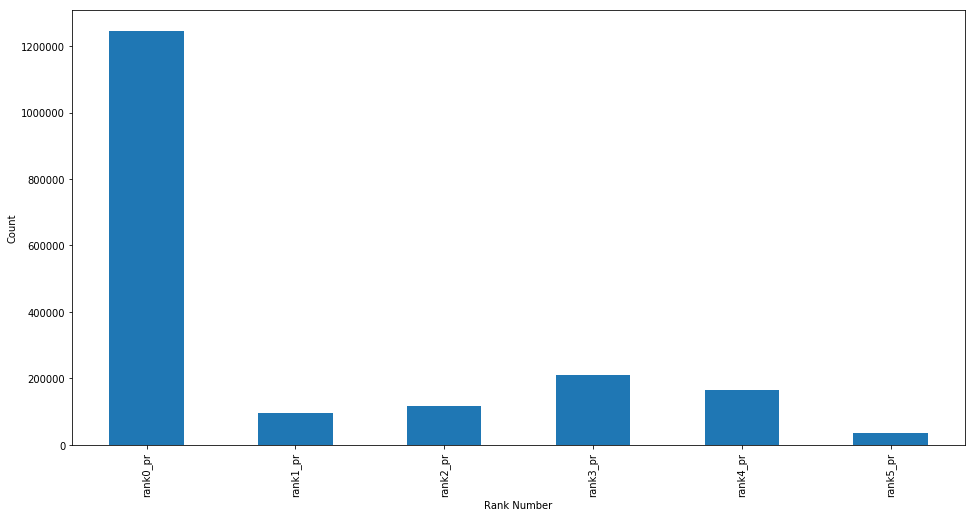

In [56]:
plt.figure(figsize=[16,8]) 
train[cols].sum().plot(kind = 'bar')
plt.xlabel('Rank Number')
plt.ylabel('Count') 

### rank0 and label

In [65]:
from datetime import timedelta 
rk = pd.DataFrame()
times = []
rank_mean = []
for i in range(7):
    st = pd.datetime(2018,11,30)- timedelta(7 * (i+1))
    en = pd.datetime(2018,11,30)  - timedelta(7 * i)
     
    index = (train['req_time'] > st ) & (train['req_time'] < en) # 
    print(st, en, i, train.loc[index, 'rank0_pr'].mean())
    rank_mean.append(train.loc[index, 'rank0_pr'].mean())
    times.append('latest week {}'.format(i))

2018-11-23 00:00:00 2018-11-30 00:00:00 0 0.6536959950358094
2018-11-16 00:00:00 2018-11-23 00:00:00 1 0.6494488712952378
2018-11-09 00:00:00 2018-11-16 00:00:00 2 0.6434281061274344
2018-11-02 00:00:00 2018-11-09 00:00:00 3 0.6153225767033096
2018-10-26 00:00:00 2018-11-02 00:00:00 4 0.6263564998910277
2018-10-19 00:00:00 2018-10-26 00:00:00 5 0.6089980940866309
2018-10-12 00:00:00 2018-10-19 00:00:00 6 0.5944949060730657


In [67]:
rk['rank_mean'] = rank_mean
rk['times'] = times

Text(0.5,0,'Weeks to now')

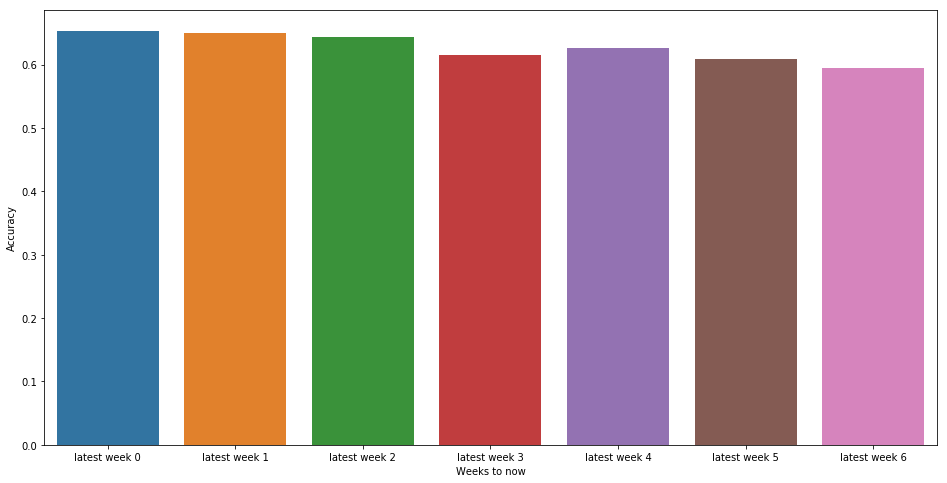

In [69]:
plt.figure(figsize=[16,8])  
sns.barplot(x =rk['times'].values, y=rk['rank_mean'].values)
# imp.sort_values('imp',ascending = False).iloc[:20].plot(kind = 'bar')
plt.ylabel('Accuracy')
plt.xlabel('Weeks to now')

# Conclusion
This notebook mainly do analysis on feature and label.